#Importing libraries and dataframe

In [148]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sklearn.metrics as metrics

In [149]:
data = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [150]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target)

In [151]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [152]:
y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [153]:
y.columns = ['price']

In [154]:
df = X.join(y)

In [155]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#Using a function for drawing boxplot graphics to see the outliers

Here we can see that the data have a lot of outliers

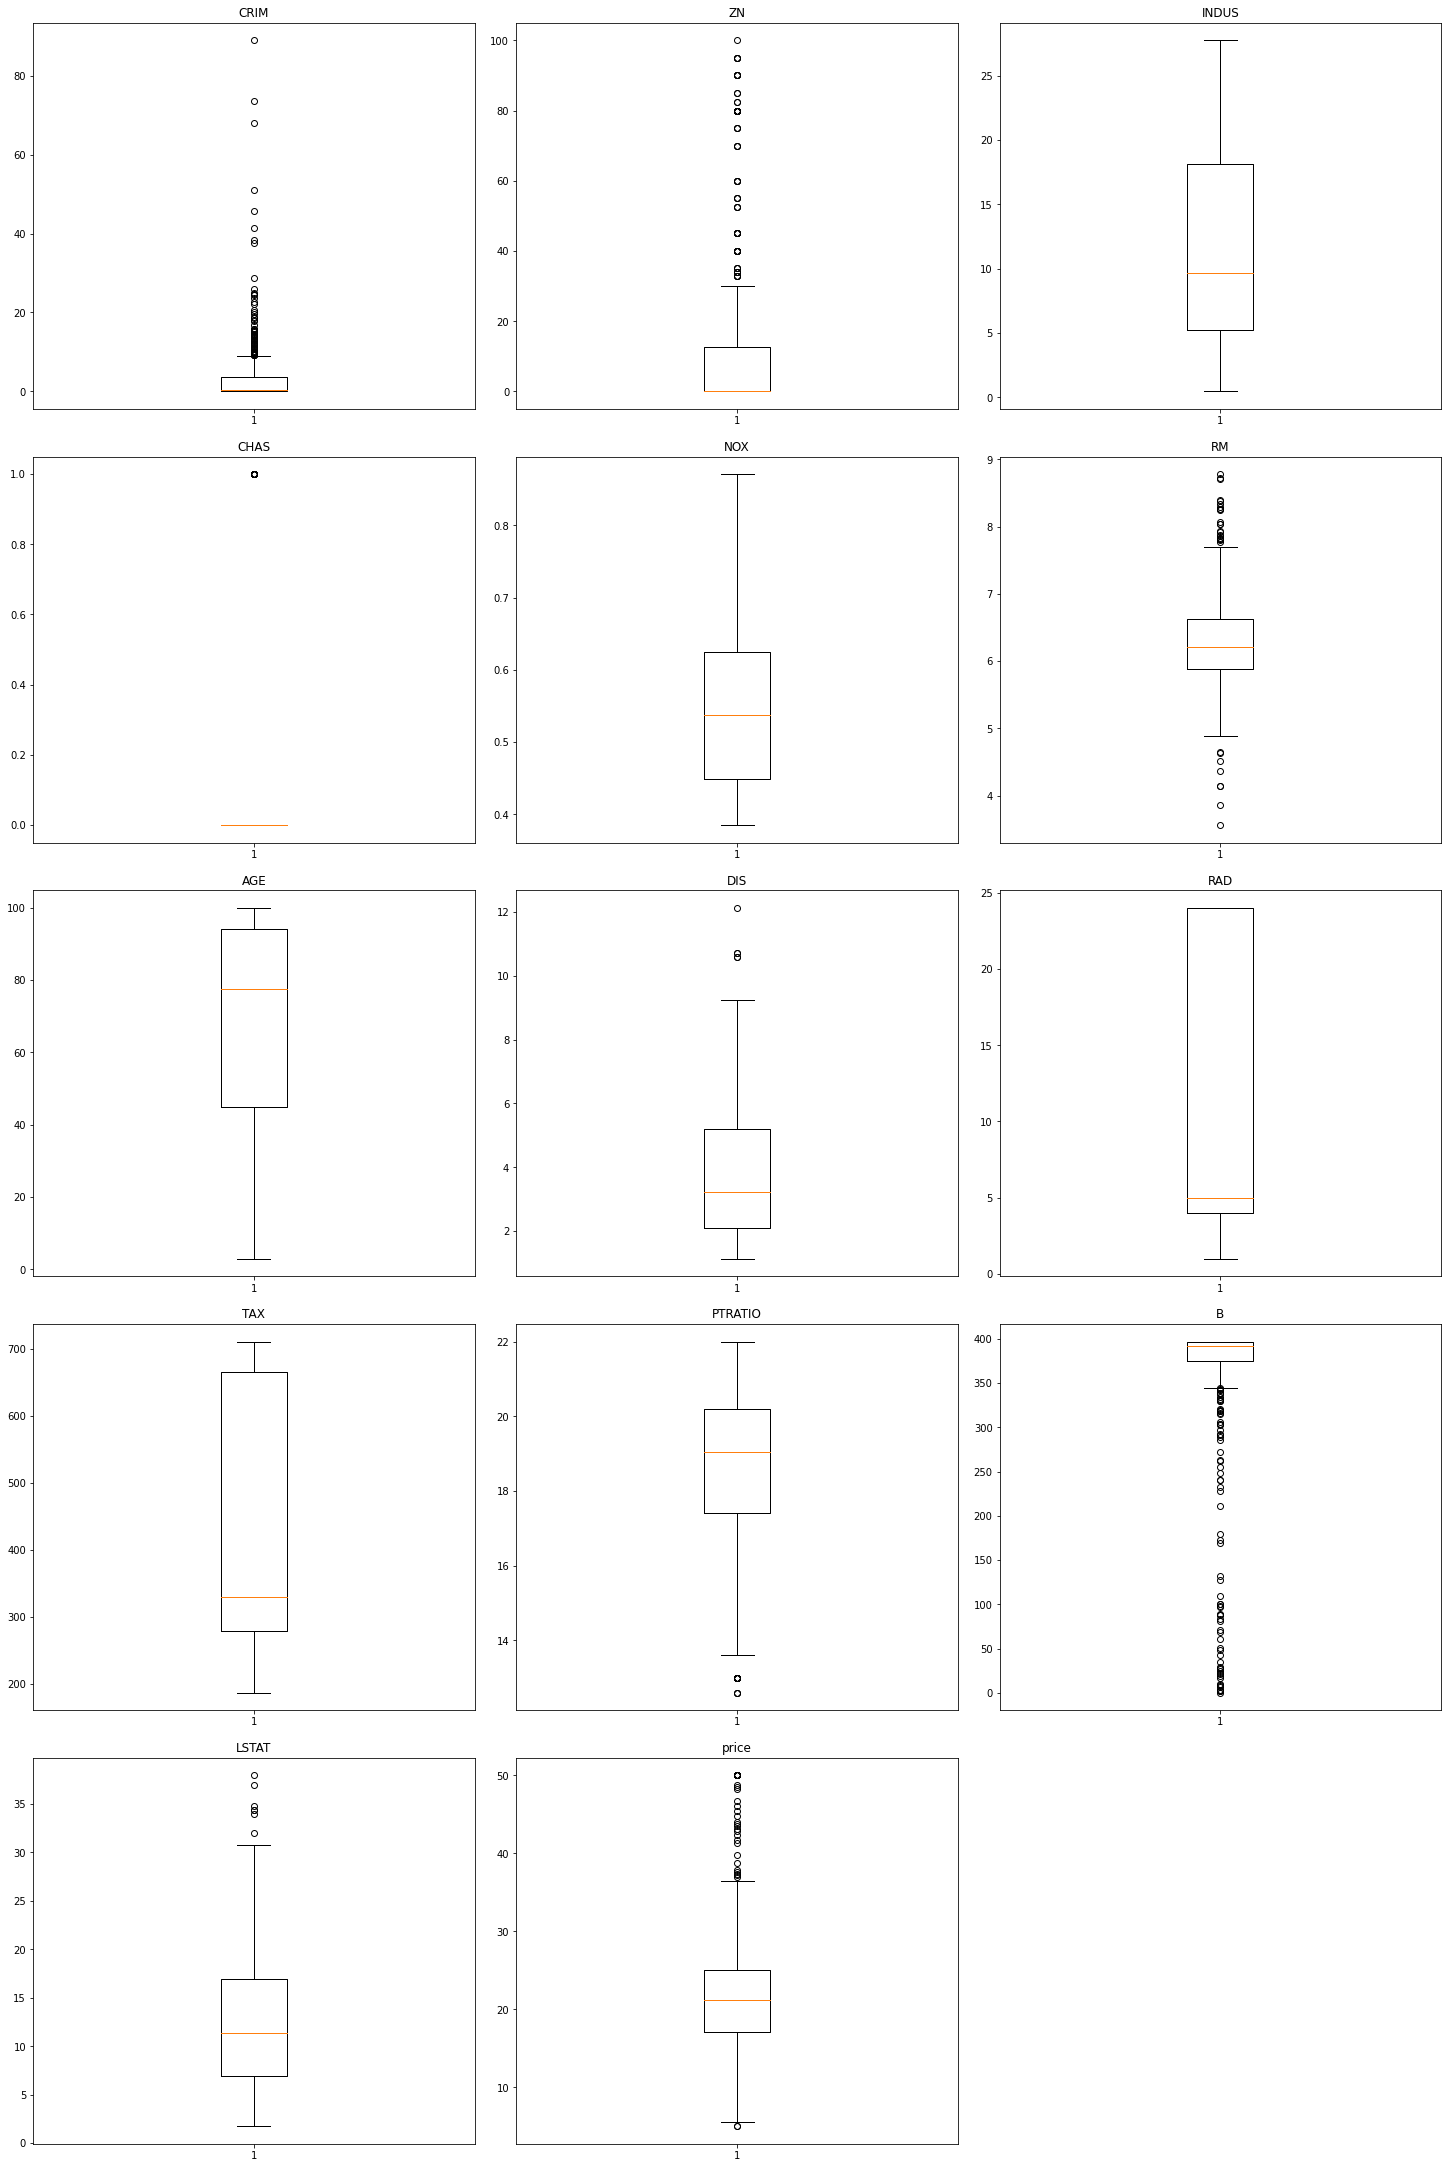

In [156]:
def draw_boxplots(df, selected_features):
  n = len(selected_features)
  fig = plt.figure(constrained_layout=True, figsize=(20, 30))
  gs = gridspec.GridSpec(int(n/3) + 1, 3, figure=fig)
  for i in range(n):
    k = int(i / 3)
    j = i % 3
    col = selected_features[i]
    ax = fig.add_subplot(gs[k, j])
    ax.set_title(col)
    ax.boxplot(df[col])

draw_boxplots(df, df.columns)

#Using a function to replace the outliers

In [157]:
def replace_outliers(df, var_names):
  for var_name in var_names:
    # calculating Q1 and Q3
    Q1 = df.loc[:,var_name].quantile(0.25)
    Q3 = df.loc[:,var_name].quantile(0.75)
    # calculating Interquartile IQR
    IQR = Q3 - Q1
    # build up filter
    filter_up = (df.loc[:,var_name] > Q3 + 1.5 *IQR)
    # apply up filter on df
    df.loc[filter_up, var_name] = Q3 + 1.5 *IQR
    # build down filter
    filter_down = (df.loc[:,var_name] < Q1 - 1.5 * IQR)
    # apply down filter on df
    df.loc[filter_down, var_name] = Q1 - 1.5 * IQR

#applying the funcion and verifying if the outliers still there

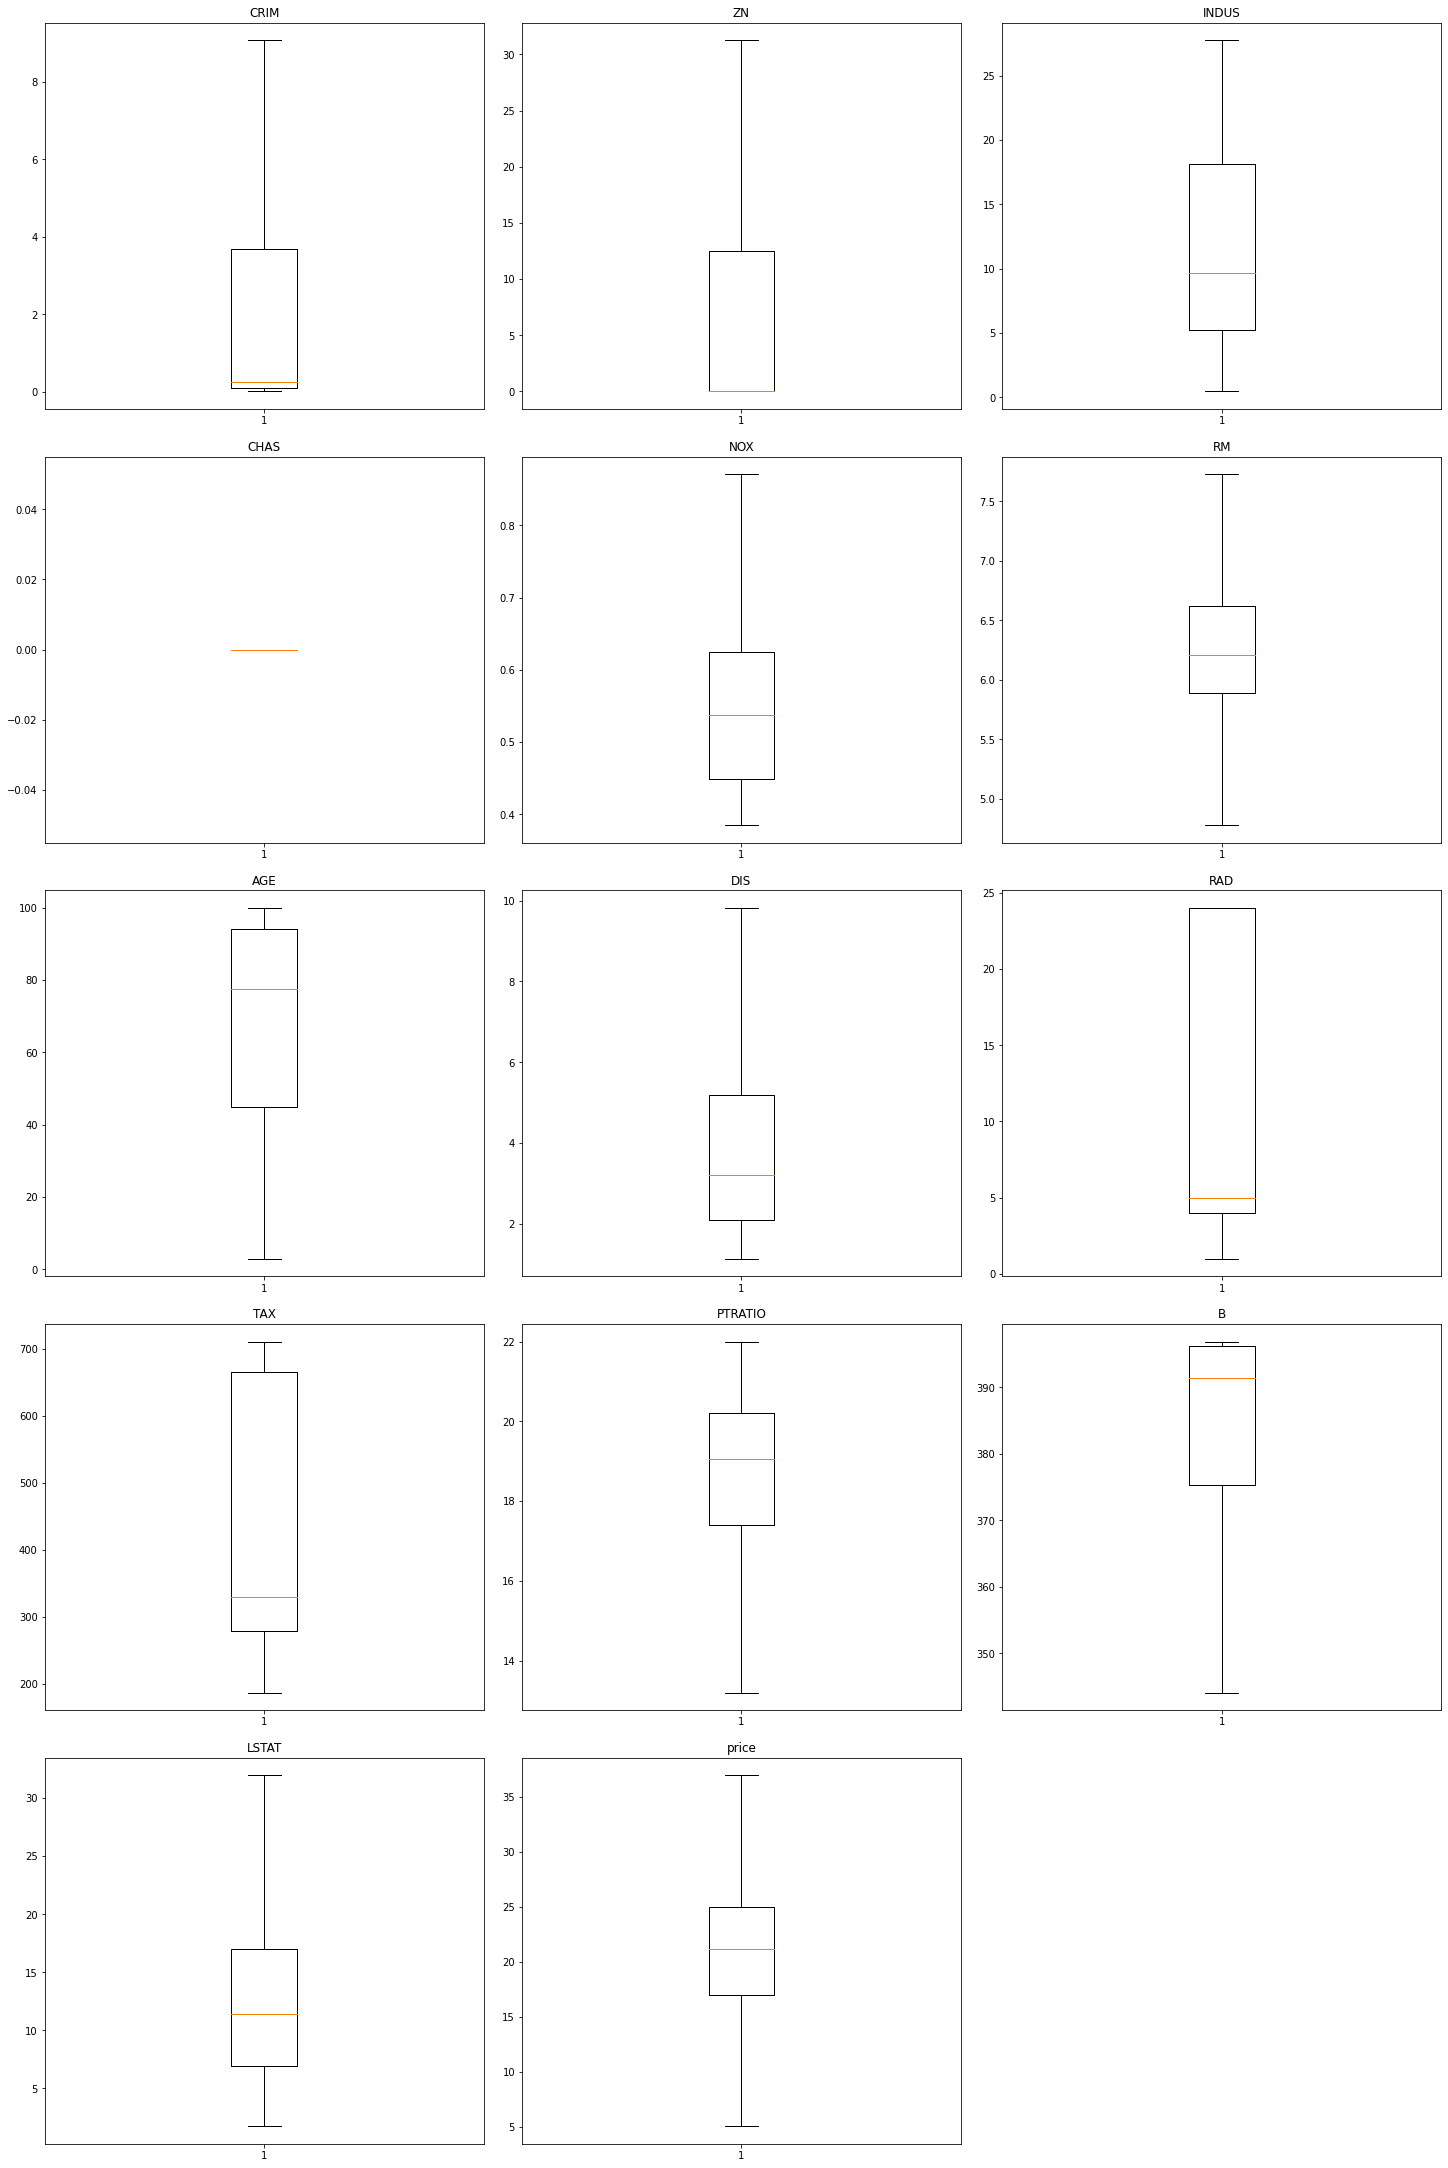

In [158]:
replace_outliers(df, df.columns)
draw_boxplots(df, df.columns)

##Now that the outliers are gone, we can do our regressions

Here we will split the target variable from the data

In [159]:
y = df['price']

In [160]:
X = df.drop(['price'], axis = 1)

Here we will split the data that we will use for test and for train of the regression

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 199)

###Linear regression

In [162]:
regLinear = LinearRegression().fit(X_train, y_train)

In [163]:
yLinear = regLinear.predict(X_test)

Metrics from the linear model without the outliers

In [164]:
print("MSE: {}".format(metrics.mean_absolute_error(y_test,yLinear)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,yLinear)))
print("R²: {}".format(metrics.r2_score(y_test,yLinear)))

MSE: 2.862753350670085
RMSE: 15.295477935387066
R²: 0.7546554118528971


###Decision Tree Regression

In [165]:
XGB = XGBRegressor().fit(X_train, y_train)

[05:11:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [166]:
yXGB = XGB.predict(X_test)

Metrics from the decision tree model without the outliers

In [167]:
print("MSE: {}".format(metrics.mean_absolute_error(y_test,yXGB)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,yXGB)))
print("R²: {}".format(metrics.r2_score(y_test,yXGB)))

MSE: 1.933917126001097
RMSE: 8.58498103502796
R²: 0.8622940293080601


##Now he need to re-import the dataframe to compare the regressions without removing the outliers

In [168]:
X0 = pd.DataFrame(data.data, columns=data.feature_names)
y0 = pd.DataFrame(data.target)
y0.columns = ['price']

In [169]:
df0 = X0.join(y0)

Checking that the outliers are there now using our function to plot boxplot graphics

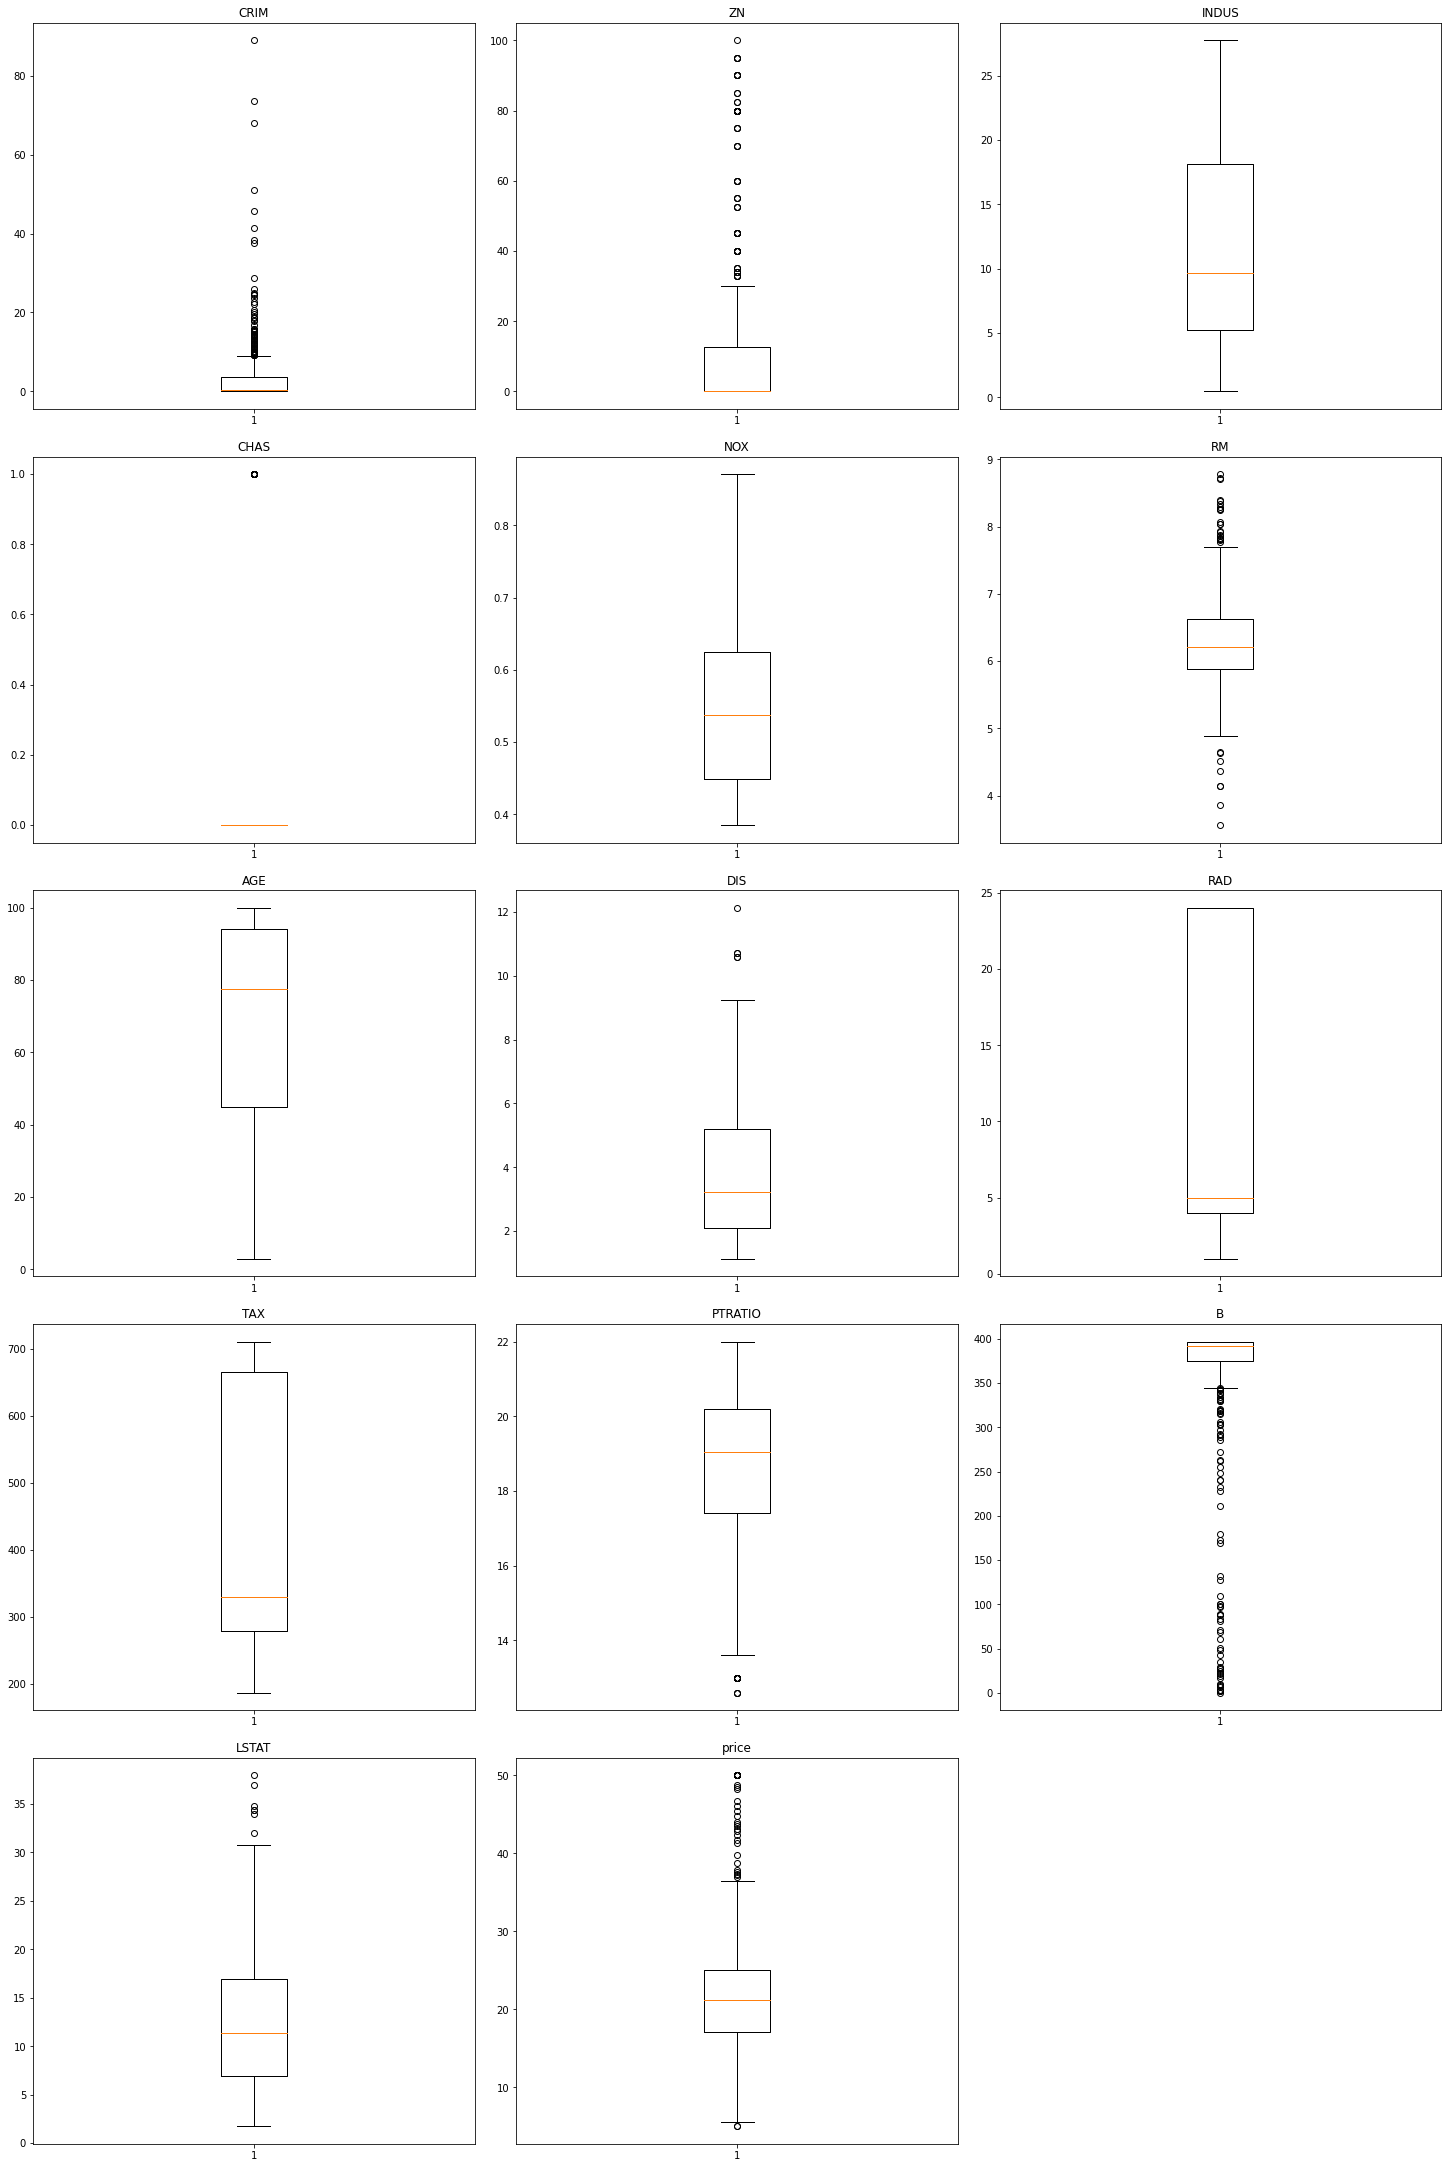

In [170]:
draw_boxplots(df0, df0.columns)

Spliting target from data and train/test mass again

In [171]:
y0 = df0['price']
X0 = df0.drop(['price'], axis = 1)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X0,y0, test_size=0.2, random_state = 199)

###Linear regression

In [173]:
regLinear0 = LinearRegression().fit(X_train, y_train)

In [174]:
yLinear0 = regLinear0.predict(X_test)

Metrics from the linear model with the outliers

In [175]:
print("MSE: {}".format(metrics.mean_absolute_error(y_test,yLinear0)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,yLinear0)))
print("R²: {}".format(metrics.r2_score(y_test,yLinear0)))

MSE: 3.19991853764427
RMSE: 23.482683606368933
R²: 0.7346589912911691


###Decision tree regression

In [176]:
XGB0 = XGBRegressor().fit(X_train, y_train)

[05:13:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [177]:
yXGB0 = XGB0.predict(X_test)

Metrics from the decision tree model with the outliers

In [178]:
print("MSE: {}".format(metrics.mean_absolute_error(y_test,yXGB0)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,yXGB0)))
print("R²: {}".format(metrics.r2_score(y_test,yXGB0)))

MSE: 1.992479653451957
RMSE: 8.709049169102967
R²: 0.9015926829249687


##We can now conclude that linear regressions are highly interfered when we have outliers, but tree regressions can deal with it a lot better, actually having best results with outliers, utilizing every data possible

Thanks for reading! :)